In [2]:
import shutil 
from tqdm import tqdm
import torch
import torchvision
from torchvision import datasets,transforms,models
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import PIL
import os
import zipfile

In [3]:
model = torch.load('model.zip',map_location='cpu')

In [4]:
model.eval
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
from PIL import *
def pre_image(image_path,model):
   img = Image.open(image_path)
   mean = [0.485, 0.456, 0.406] 
   std = [0.229, 0.224, 0.225]
   transform_norm = transforms.Compose([transforms.ToTensor(), 
   transforms.Resize((224,224)),transforms.Normalize(mean, std)])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # input = Variable(image_tensor)
   img_normalized = img_normalized.to(device)
   plt.imshow(img)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()  
      output =model(img_normalized)
      print(output)
      index = output.data.cpu().numpy().argmax()
      return "dog" if index == 1 else "cat"

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[ 4.1732, -4.2049]])
cat


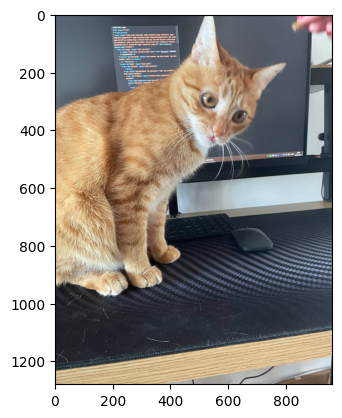

In [6]:
name = 'input.jpg'
result = pre_image(name,model)
print(result)